# Task 1
Here I import the files and merged them using the "merge" function. I call the merged file "combdata". Then I review the data to check that it looks correct.

In [ ]:
pip install pandas
import pandas as pd

# read in the data
games = pd.read_csv("data/afl/games.csv")
players = pd.read_csv("data/afl/players.csv")
stats = pd.read_csv("data/afl/stats.csv")

#merge the data
combdata=pd.merge(how="left",left=stats,left_on="playerId",right=players,right_on="playerId")
combdata=pd.merge(how="left",left=combdata,left_on="gameId",right=games,right_on="gameId")

#view the combined data set
display (combdata)
print("")
display(combdata.info())
print("")
display(combdata.describe())

SyntaxError: invalid syntax (3494831059.py, line 1)

# Task 2
To complete this task, I create a mask for the records for only Lance Franklin. I sort the records by number of games and then set the index to number of games: this ensure that the x-axis of the  plot will show an increasing number of games (left to right). I then calculate the cummulative sum of goals with the index = number of games.

<Axes: title={'center': 'Lance Franklin Cummulative Goals Over Time'}, xlabel='Games Played', ylabel='Cummulative Goals'>

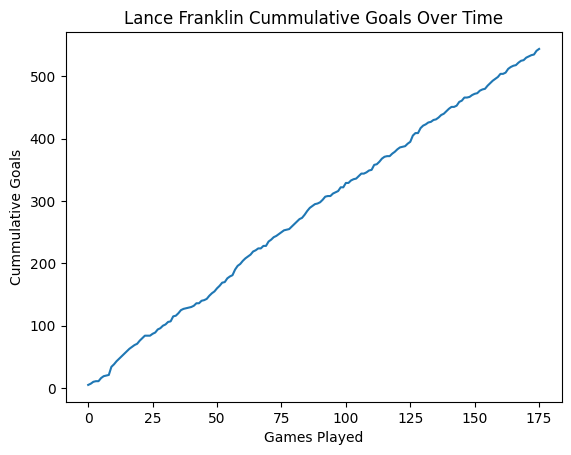

In [3]:
#For a particular player - say "Franklin, Lance" - plot their accumlation of goals over time. The x-axis should be the number of games played and the y-axis should be the number of goals accumulated. Thus we expect to see a line that monotonically increases, but in what way will depend on the player's career.
 
import pandas as pd
import matplotlib.pyplot as plt

mask_player = combdata['displayName_x'] == "Franklin, Lance"

player_record = combdata[mask_player]
player_record=player_record.sort_values(by="gameNumber")
player_record=player_record.set_index("gameNumber")
player_cumsum_goals= player_record["Goals"].cumsum()

player_cumsum_goals.reset_index(drop=True).plot(label=True,title="Lance Franklin Cummulative Goals Over Time",xlabel="Games Played",ylabel="Cummulative Goals")

In the graph above, we see a very consistent increase in goals as Lance Franklin plays more games. He is obviously a very reliable goal scorer: scoring at a consistent rate in each game.

# Task 3

Here I create a list of players that can be itereated over. I then loop the same code as that used for Task 2 to create plots for all players.

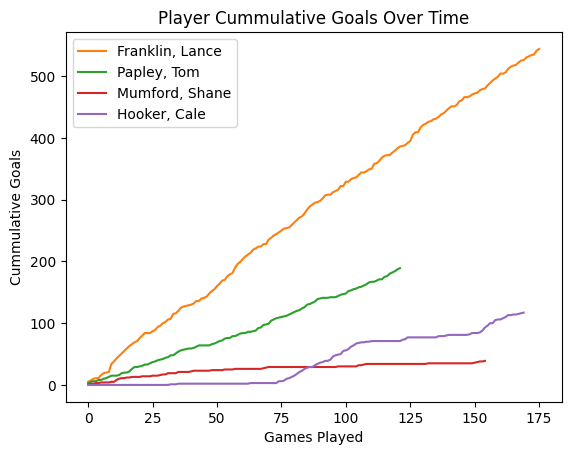

In [4]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt

#creating a blank canvas
canvas =pd.Series([], dtype=float).plot()
#creating a list of the relevant players to interate over
players = ["Franklin, Lance", "Papley, Tom", "Mumford, Shane", "Hooker, Cale"]
# filtering, sorting, indexing and plotting data for each player in turn
for player in players:
    mask_player = combdata['displayName_x'] == player
    player_record = combdata[mask_player]
    player_record=player_record.sort_values(by="gameNumber")
    player_record=player_record.set_index("gameNumber")
    player_cumsum_goals= player_record["Goals"].cumsum()
    player_cumsum_goals.reset_index(drop=True).plot(label=player,title="Player Cummulative Goals Over Time",xlabel="Games Played",ylabel="Cummulative Goals")
plt.legend()






In the graph above, we see that,
a) the other playes are less prolific goal scorers that Lance Franklin: they average fewer goals scored per game
b) the plots of Tom Papley's and Shane Mumford's cummulative goals over time are close to straight lines, showing that they too score goals at consistent rates in each game.
c) the plot of Cale Hooker's goals over time is not straight; this shows an inconsistent rate of scoring goals. The increasing gradient over time shows that Cale's preformance improves with the number of games he played.

# Task 4

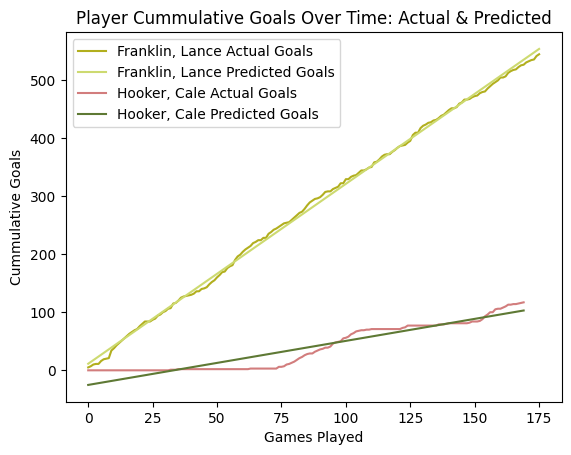

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy


canvas =pd.Series([], dtype=float).plot()
players = ["Franklin, Lance", "Hooker, Cale"]
for player in players:
    mask_player = combdata['displayName_x'] == player
    player_record = combdata[mask_player]
    player_record=player_record.sort_values(by="gameNumber")
    player_record=player_record.set_index("gameNumber")
    player_cumsum_goals= player_record["Goals"].cumsum()
    chosen_colour=[(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))]
    player_cumsum_goals.reset_index(drop=True).plot(label=str(player) + " Actual Goals",title="Player Cummulative Goals Over Time: Actual & Predicted",xlabel="Games Played",ylabel="Cummulative Goals",color=chosen_colour, ax=canvas)

    x = player_record.index
    y = player_cumsum_goals
    coefficients = numpy.polyfit(x, y, 1)
    formula = numpy.poly1d(coefficients)
    goals_predictions = pd.Series(formula(x))
    chosen_colour=[(random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))]
    goals_predictions.plot(label=str(player) + " Predicted Goals", legend=True,  color=chosen_colour, ax=canvas)

plt.legend()

This graph shows predicted and actual goals (cummulative) for the players Lance Franklin and Cale Hooker according to the numbe of games they have played. The predictions are based on linear regression.
Given Lancce Franklin consistent rate of scoring, simple linear  regression forecasts his cummulate goals resonably well. Since Cale Hooker scores less consistently, a straight line linear regression does not predict his cummulative scoring as well: as seen by the divergence between his actual goals and forecast goals. Interestingly, I played around with the .polyfit() attributes and found that a 5th degree fitting of the polynomial fits the actual goals line quite well.